# Pairwise Matching NER
This notebook addresses the questions:
- how well do NER extracted attributes match the real ones?

Since we have lists and multiple entities can be extracted, we first only consider one item (first item).


In [12]:
import pandas as pd

data = pd.read_parquet("../data/prediction/shs100k2_ner.parquet")

# clean up
def get_first_item(x):
    try:
        return list(set(x))[0]
    except:
        return ''
    
data["title_ner_first"] = data["title_ner"].apply(lambda x: get_first_item(x))


# String Matching

In [24]:
import os
import sys
sys.path.append(os.path.abspath('..'))
from src.Matcher import Matcher

def string_match_lower(left_str: str, right_str: str, score_cutoff=None):
    return float(left_str.lower() in right_str.lower())

simple_matcher = Matcher(func=string_match_lower)


left = ["title_processed"]
right = ["title_ner_first"]

data_simple = simple_matcher.match_pairwise(data, left, right, level="attr")
data_simple[('title_processed', 'title_ner_first')].value_counts(normalize=True)



(title_processed, title_ner_first)
1.0    0.786971
0.0    0.213029
Name: proportion, dtype: float64

# Token Ratio

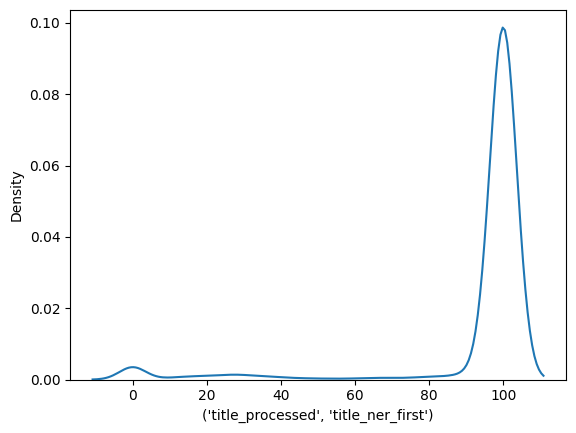

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fuzzy_matcher = Matcher("fuzz.token_ratio")

data_fuzzy = fuzzy_matcher.match_pairwise(data, left, right, level="attr")

sns.kdeplot(data_fuzzy[('title_processed', 'title_ner_first')])
plt.show()


# Error Analysis

In [38]:
data_error = data_simple[(data_simple[('title_processed', 'title_ner_first')] == 0) & 
                         (data_simple.title_processed.apply(lambda x: x != ""))][
    ["yt_processed", "title_processed", "title_ner"]]


### No tags extracted?

In [39]:
data_error[data_error.title_ner.apply(len) == 0]


,yt_processed,title_processed,title_ner
yt_id,,,
nN31AKEWnFs,yesterday ventures ken newell from their 1967 ...,yesterday,[]
xR02i44_rMw,ruth brown y e s t e r d a y samemusicscene ma...,yesterday,[]
L96631BRHi4,catherine spaak ieri gruppo facebook nuovo cia...,ieri,[]
MvrbrbgIfiY,tulsa mclean rock on elvis pt2 les gray of mud...,the songs of the king love me tender heartbrea...,[]
F156ZZHsnh4,vocal point elvis medley onhech vocal point a ...,medley dont be cruel cant help falling in love...,[]
...,...,...,...
sOpGcfFvMLM,sun of jamaica audrey landers vangulden1 sun o...,sun of jamaica,[]
YGrLuscbpXI,emmylou harris chapter 33 kris kristofferson i...,the pilgrim chapter 33,[]
-E_Hyn53acA,christophe aline glivingston73,aline,[]


In [40]:
data_error[data_error.title_ner.apply(len) != 0]


,yt_processed,title_processed,title_ner
yt_id,,,
EzrRJ8CA4Po,ne luumäet mä haluun rauhottua i wanna be seda...,mä haluun rauhottua,"[haluun, i, i]"
AeJ9d-U55TI,america los machucambos lp dansez avec los mac...,america,[los]
b7bwh_xN7ag,marzio dance rap o hush original version goody...,hush,[rap]
m2RjGG9Bm60,平賀マリカ featマルコス ヴァリ batucada space shower music...,batucada,"[平, 平, 平]"
f0AXjnSAMCs,four deep tones castle rock just in case you c...,castle rock,"[castle rock just in case you change, mind]"
CbU6Ah01kcQ,erdmöbel einer wie wir by fastfoodfilm no1hits...,einer wie wir,"[einer wie wir, hat, einer wie wir]"
Bye-eCQwOV0,hard ons 1970 lucydeal,1970,[hard ons]
QZcNFYkl1eA,mel g mel b word up vestnick mel g mel b word up,word up,"[mel, word up, mel, word up]"
-il1Arp0TOI,vibrators im stranded the saints lyrics spyros...,stranded,"[im stranded, im stranded, stranded, im, im st..."
